In [ ]:
#Importing the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import nltk
from pylab import *
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
resumeDataSet = pd.read_csv('ResumeDataset.csv' ,encoding='utf-8')


In [ ]:
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()
resumeDataSet.tail()




,Category,Resume,cleaned_resume
286,Web Designing,Image editing,
287,Web Designing,Digital Retouching,
288,Web Designing,Creativity,
289,Web Designing,SEO Knowledge,
290,Web Designing,Photoshop,


In [ ]:
print ("Displaying the distinct categories of resume -")
print (resumeDataSet['Category'].unique())


Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Web Designing' 'Mechanical Engineer'
 'Sales' 'Civil Engineer' 'Java Developer' 'Business Analyst'
 'SAP Developer' 'Automation Testing' 'Electrical Engineering'
 'Operations Manager' 'Python Developer' 'DevOps Engineer'
 'Network Security Engineer' 'PMO' 'Database' 'Hadoop' 'ETL Developer'
 'DotNet Developer' 'Blockchain' 'Testing' nan 'HR ']


In [ ]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Business Analyst             27
Java Developer               26
Database                     22
Web Designing                16
Testing                      14
DevOps Engineer              14
Hadoop                       14
ETL Developer                14
Data Science                 12
HR                           12
Blockchain                   12
Electrical Engineering       12
DotNet Developer             10
Python Developer             10
Network Security Engineer    10
PMO                           9
SAP Developer                 8
Automation Testing            8
Advocate                      8
Sales                         8
Mechanical Engineer           8
Operations Manager            6
HR                            6
Civil Engineer                4
Name: Category, dtype: int64


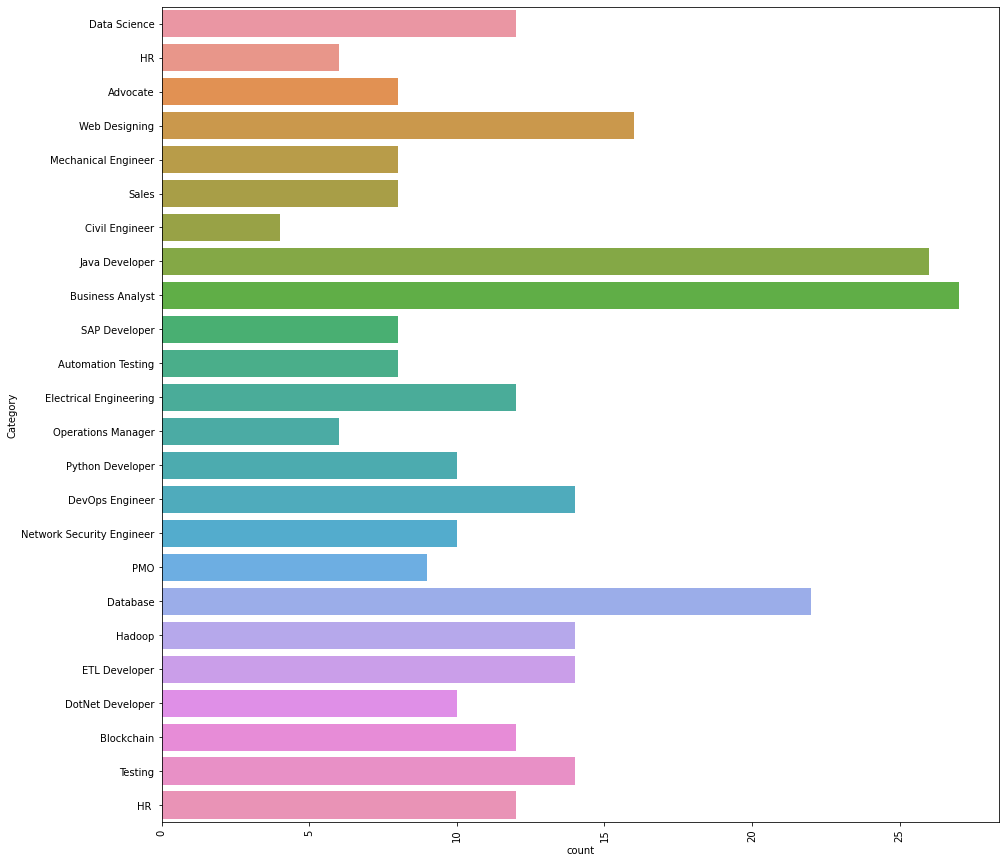

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)

ValueError: ignored

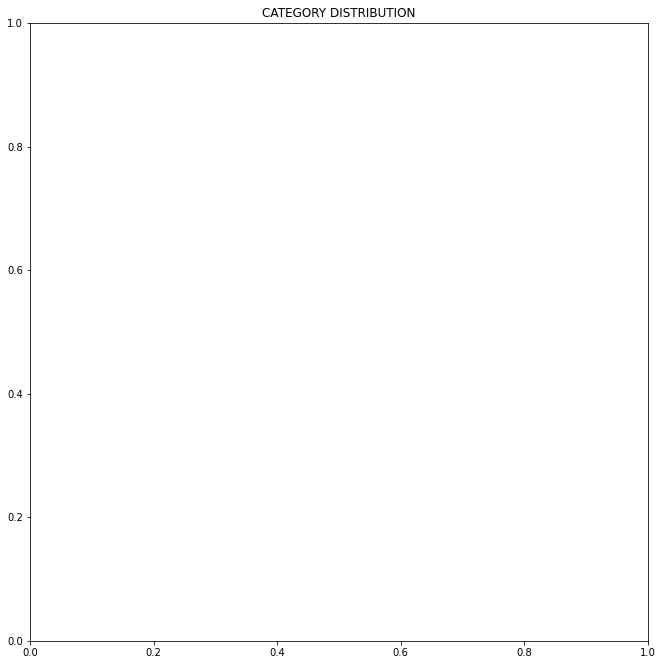

In [ ]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [ ]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [ ]:
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))
print (resumeDataSet)

TypeError: ignored

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for i in range(0,114):
    cleanedText = (cleanResume(Sentences[i]))
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print( mostcommon)

wc = WordCloud().generate(cleanedSentences)
#plt.figure(figsize=(15,15))
#plt.imshow(wc, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])
print ("CONVERTED THE CATEGORICAL VARIABLES INTO NUMERICALS")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values




In [ ]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.1)
print(X_train.shape)
print(X_test.shape)
print(le.inverse_transform(y_test))


In [ ]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
#print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

print(le.inverse_transform(prediction))


In [ ]:
#clf = OneVsRestClassifier(MultinomialNB()).fit(X_train, y_train)
#prediction = clf.predict(X_test)
#print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
#print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
#print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))
#print(le.inverse_transform(prediction))

In [ ]:
skills= list(map(str,input('Enter the skills: ').split()))
skills = np.asarray(skills)
skills_feature = word_vectorizer.transform(skills)
skills_prediction = clf.predict(skills_feature)
print('The category is: ' ,le.inverse_transform(skills_prediction))
